In [4]:
"""Fix columns """

'Fix columns '

In [5]:
import pandas as pd

# Number of chunks desired
num_chunks = 10

# Count total rows (excluding header)
total_rows = sum(1 for _ in open('/Users/nshaffer/Desktop/TSLA L2/XNAS-20251128-V7KRYJ435W/TSLA_2025-08-27_to_2025-11-26.csv')) - 1

# Compute chunk size for roughly equal chunks
chunk_size = total_rows // num_chunks

mbp10_headers = [
    'ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
    'action', 'side', 'depth', 'price', 'size', 'flags', 
    'ts_in_delta', 'sequence',
    'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00', 'bid_ct_00', 'ask_ct_00',
    'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01', 'bid_ct_01', 'ask_ct_01',
    'bid_px_02', 'ask_px_02', 'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02',
    'bid_px_03', 'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
    'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04', 'ask_ct_04',
    'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05', 'bid_ct_05', 'ask_ct_05',
    'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06', 'bid_ct_06', 'ask_ct_06',
    'bid_px_07', 'ask_px_07', 'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07',
    'bid_px_08', 'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
    'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09', 'ask_ct_09'
]

chunk_index_to_load = 2  # For example, the 3rd chunk (0-based)

reader = pd.read_csv(
    '/Users/nshaffer/Desktop/TSLA L2/XNAS-20251128-V7KRYJ435W/TSLA_2025-08-27_to_2025-11-26.csv',
    header=0,
    chunksize=chunk_size
)

df = None  # Initialize variable for the chunk DataFrame

for i, chunk in enumerate(reader):
    if i == chunk_index_to_load:
        # Shift headers left by 1 (same logic as before)
        chunk.columns = mbp10_headers[:len(chunk.columns)-1] + [mbp10_headers[-1]]
        df = chunk
        break

# Now df_chunk contains the desired chunk as a DataFrame
print(f"Loaded chunk {chunk_index_to_load + 1} with shape: {df.shape}")
print(df.head())


Loaded chunk 3 with shape: (19757290, 74)
                                 ts_recv                        ts_event  \
39514580  2025-09-16T17:40:17.834004370Z  2025-09-16T17:40:17.833841598Z   
39514581  2025-09-16T17:40:17.834046008Z  2025-09-16T17:40:17.833882379Z   
39514582  2025-09-16T17:40:17.834057408Z  2025-09-16T17:40:17.833894762Z   
39514583  2025-09-16T17:40:17.834084341Z  2025-09-16T17:40:17.833920809Z   
39514584  2025-09-16T17:40:17.834110924Z  2025-09-16T17:40:17.833948052Z   

          rtype  publisher_id  instrument_id action side  depth   price  size  \
39514580     10             2          16244      C    B      3  418.19    25   
39514581     10             2          16244      A    A      1  418.30    10   
39514582     10             2          16244      C    B      0  418.22    20   
39514583     10             2          16244      A    A      0  418.27    25   
39514584     10             2          16244      A    A      0  418.26    50   

          flag

In [6]:
import pandas as pd

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Load the CSV (assuming it's already loaded as 'df' from previous cell)
# df = pd.read_csv('TSLA_2025-08-27_to_2025-11-26.csv')

# Show first 5 rows with all columns visible
df.tail(30)


,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,ask_ct_09
59271840,2025-09-25T15:44:45.233141296Z,2025-09-25T15:44:45.232977492Z,10,2,16244,C,B,3,428.75,25,128,163804,371516175,428.78,428.82,30,135,1,3,428.77,428.84,56,145,3,4,428.76,428.86,364,145,5,4,428.75,428.87,101,60,5,3,428.74,428.88,335,45,3,3,428.73,428.89,25,281,1,8,428.72,428.9,27,25,2,1,428.71,428.91,30,27,2,2,428.70,428.92,281,25,9,1,428.69,428.93,33,27,3,2,TSLA
59271841,2025-09-25T15:44:45.233143431Z,2025-09-25T15:44:45.232980637Z,10,2,16244,C,B,0,428.78,30,128,162794,371516177,428.77,428.82,56,135,3,3,428.76,428.84,364,145,5,4,428.75,428.86,101,145,5,4,428.74,428.87,335,60,3,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,27,9,2,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271842,2025-09-25T15:44:45.233149401Z,2025-09-25T15:44:45.232986403Z,10,2,16244,A,A,0,428.82,100,128,162998,371516180,428.77,428.82,56,235,3,4,428.76,428.84,364,145,5,4,428.75,428.86,101,145,5,4,428.74,428.87,335,60,3,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,27,9,2,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271843,2025-09-25T15:44:45.233156271Z,2025-09-25T15:44:45.232992169Z,10,2,16244,A,A,2,428.86,25,128,164102,371516183,428.77,428.82,56,235,3,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,335,60,3,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,27,9,2,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271844,2025-09-25T15:44:45.233164674Z,2025-09-25T15:44:45.233001304Z,10,2,16244,C,B,3,428.74,25,128,163370,371516185,428.77,428.82,56,235,3,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,310,60,2,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,27,9,2,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271845,2025-09-25T15:44:45.233167612Z,2025-09-25T15:44:45.233004153Z,10,2,16244,C,B,0,428.77,25,128,163459,371516186,428.77,428.82,31,235,2,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,310,60,2,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,27,9,2,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271846,2025-09-25T15:44:45.233202089Z,2025-09-25T15:44:45.233039219Z,10,2,16244,C,A,7,428.91,2,128,162870,371516190,428.77,428.82,31,235,2,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,310,60,2,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,25,9,1,428.69,428.92,33,25,3,1,428.68,428.93,44,27,5,2,TSLA
59271847,2025-09-25T15:44:45.233204742Z,2025-09-25T15:44:45.233041699Z,10,2,16244,C,A,9,428.93,2,128,163043,371516191,428.77,428.82,31,235,2,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,310,60,2,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,25,9,1,428.69,428.92,33,25,3,1,428.68,428.93,44,25,5,1,TSLA
59271848,2025-09-25T15:44:45.233346554Z,2025-09-25T15:44:45.233183756Z,10,2,16244,C,B,0,428.77,30,128,162798,371516196,428.77,428.82,1,235,1,4,428.76,428.84,364,145,5,4,428.75,428.86,101,170,5,5,428.74,428.87,310,60,2,3,428.73,428.88,25,45,1,3,428.72,428.89,27,281,2,8,428.71,428.9,30,25,2,1,428.70,428.91,281,25,9,1

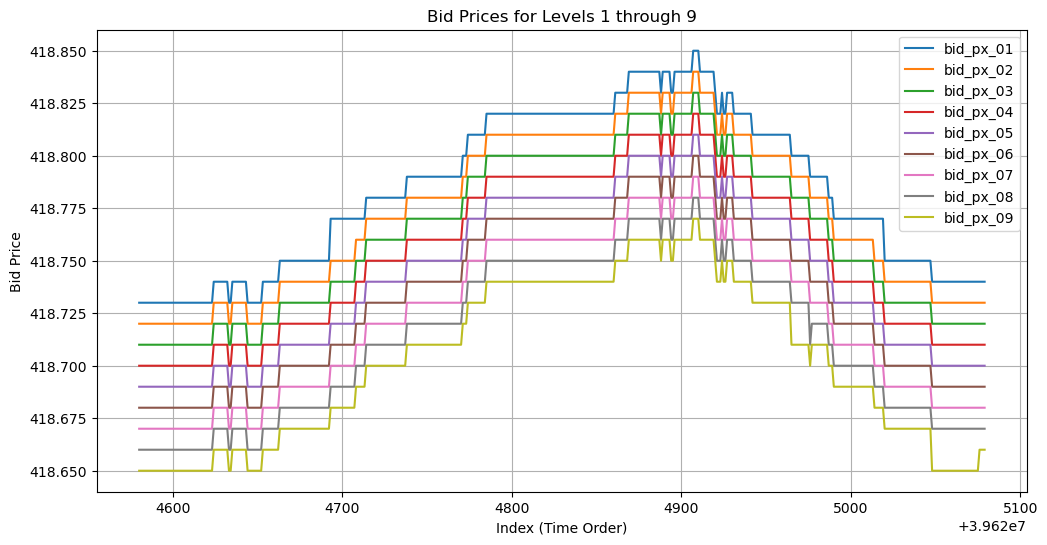

In [7]:
# Bid Prices 
import matplotlib.pyplot as plt
df_trimmed = df.iloc[110000:110500]
# Levels 1 through 9 bid price columns (excluding level 0 which is the best bid)
bid_levels = [f'bid_px_0{i}' for i in range(1, 10)]

plt.figure(figsize=(12, 6))


for level in bid_levels:
    plt.plot(df_trimmed.index, df_trimmed[level], label=level)

plt.title('Bid Prices for Levels 1 through 9')
plt.xlabel('Index (Time Order)')
plt.ylabel('Bid Price')
plt.legend()
plt.grid(True)
plt.show()


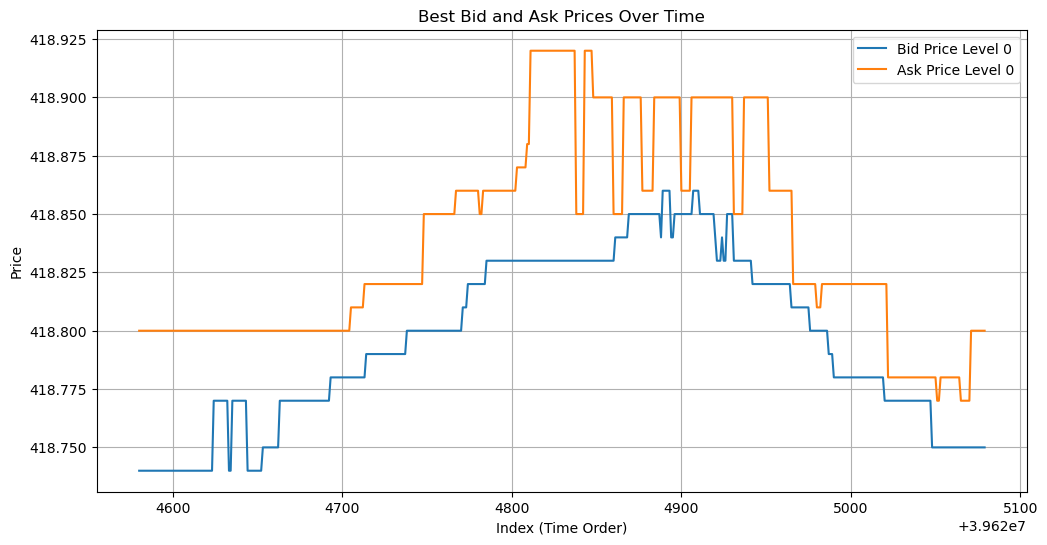

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_trimmed.index, df_trimmed['bid_px_00'], label='Bid Price Level 0')
plt.plot(df_trimmed.index, df_trimmed['ask_px_00'], label='Ask Price Level 0')

plt.title('Best Bid and Ask Prices Over Time')
plt.xlabel('Index (Time Order)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Creating Ratios 
# Calculate bid depth as sum of (bid_count * bid_price * bid_size) across all levels 0-9
bid_depth = sum(
    df[f'bid_ct_0{i}'] * df[f'bid_px_0{i}'] * df[f'bid_sz_0{i}']
    for i in range(9)
)

df['bid_depth'] = bid_depth
ask_depth = sum(
    df[f'ask_ct_0{i}'] * df[f'ask_px_0{i}'] * df[f'ask_sz_0{i}']
    for i in range(9)
)

df['ask_depth'] = ask_depth


df['depth_imbalance'] = (bid_depth - ask_depth) / (bid_depth + ask_depth)
df["100order_return"] = df['price']/df['price'].shift(100) - 1

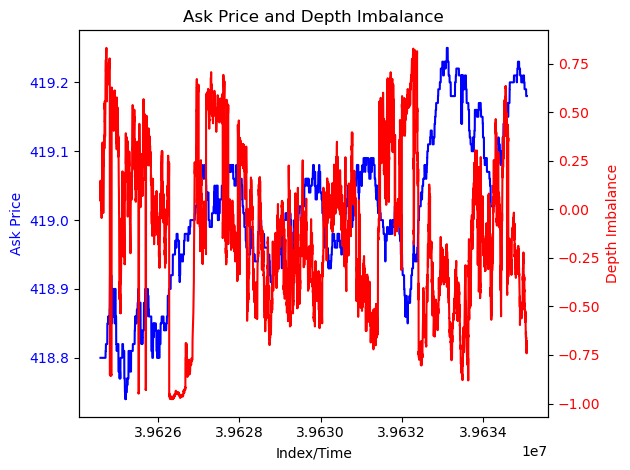

In [10]:
import matplotlib.pyplot as plt
df_trimmed = df.iloc[110000:120500]
fig, ax1 = plt.subplots()  # Create figure and primary axis

# Plot ask price on primary y-axis
ax1.plot(df_trimmed.index, df_trimmed['ask_px_00'], color='blue', label='Ask Price')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_trimmed.index, df_trimmed['depth_imbalance'], color='red', label='Depth Imbalance')
ax2.set_ylabel('Depth Imbalance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Ask Price and Depth Imbalance')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


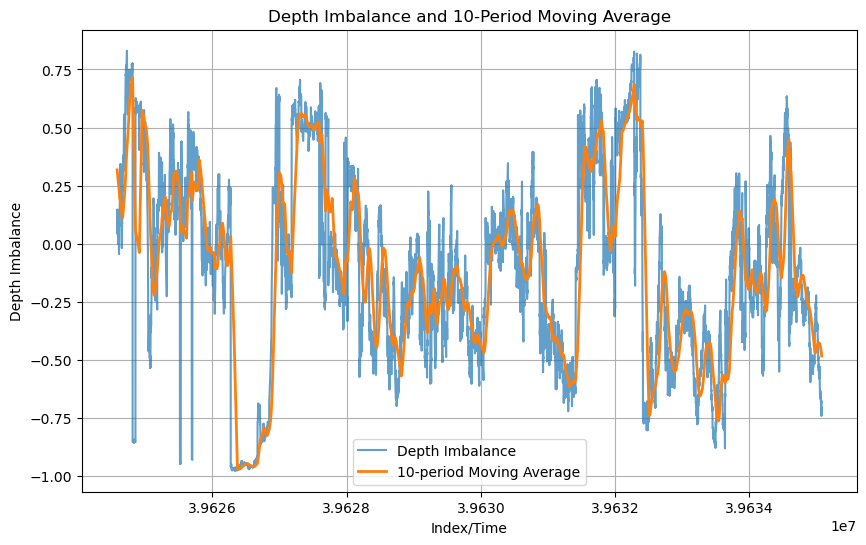

In [11]:
import matplotlib.pyplot as plt


# Calculate 10-period moving average
df['depth_imbalance_MA10'] = df['depth_imbalance'].rolling(window=100).mean()
df_trimmed = df.iloc[110000:120500]
# Plot original depth imbalance and moving average
plt.figure(figsize=(10, 6))
plt.plot(df_trimmed.index, df_trimmed['depth_imbalance'], label='Depth Imbalance', alpha=0.7)
plt.plot(df_trimmed.index, df_trimmed['depth_imbalance_MA10'], label='10-period Moving Average', linewidth=2)
plt.xlabel('Index/Time')
plt.ylabel('Depth Imbalance')
plt.title('Depth Imbalance and 10-Period Moving Average')
plt.legend()
plt.grid(True)
plt.show()



In [12]:
lag = 100
df['depth_imbalance_MA10_pct_change'] = df['depth_imbalance_MA10'].pct_change(periods=lag)

/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_5886/1816858807.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['depth_imbalance_MA10_pct_change'] = df['depth_imbalance_MA10'].pct_change(periods=lag)


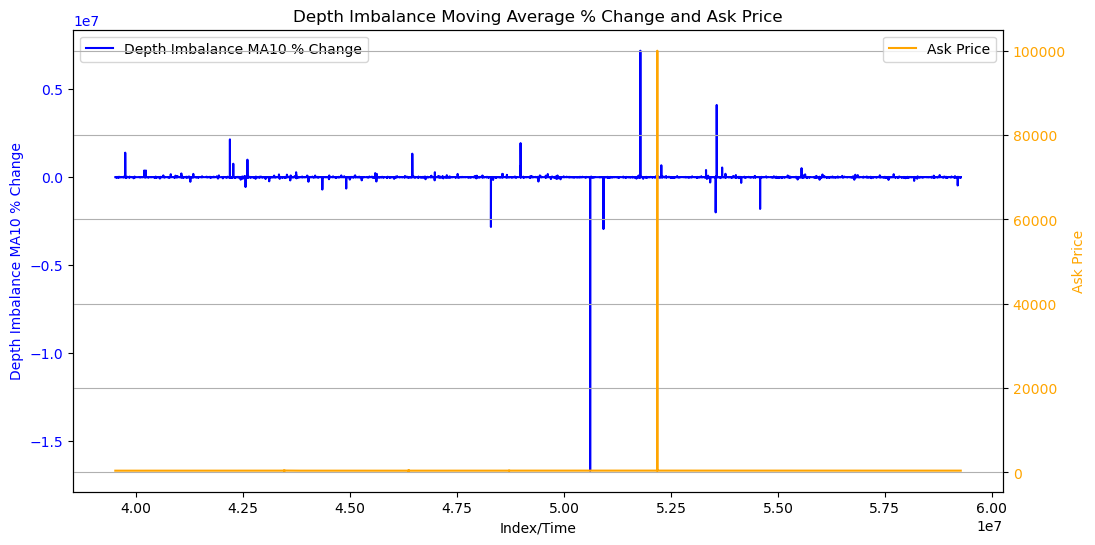

In [13]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 6))


# Plot depth imbalance moving average percent change on primary y-axis
ax1.plot(df.index, df['depth_imbalance_MA10_pct_change'], label='Depth Imbalance MA10 % Change', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Depth Imbalance MA10 % Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# Title and legends
plt.title('Depth Imbalance Moving Average % Change and Ask Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.grid(True)
plt.show()

In [14]:
# Walk Ratio
df['ask_product_sum'] = (
    df['ask_px_00'] * df['ask_sz_00'] * df['ask_ct_00'] +
    df['ask_px_01'] * df['ask_sz_01'] * df['ask_ct_01'] +
    df['ask_px_02'] * df['ask_sz_02'] * df['ask_ct_02']
)

df['bid_product_sum'] = (
    df['bid_px_00'] * df['bid_sz_00'] * df['bid_ct_00'] +
    df['bid_px_01'] * df['bid_sz_01'] * df['bid_ct_01'] +
    df['bid_px_02'] * df['bid_sz_02'] * df['bid_ct_02']
)

df['ask_bid_ratio'] = df['ask_product_sum'] / df['bid_product_sum']


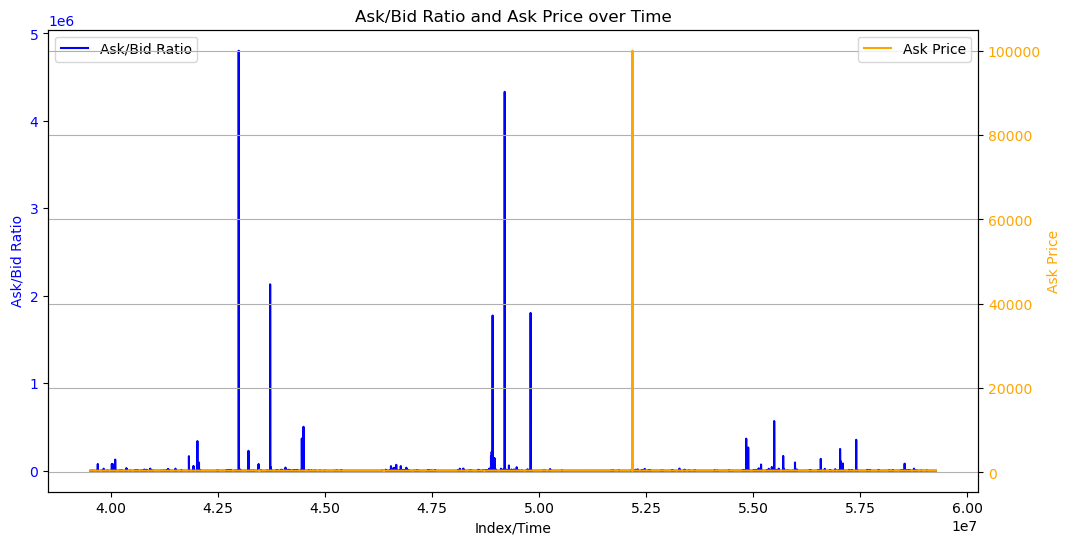

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the ask_bid_ratio on the primary y-axis
ax1.plot(df.index, df['ask_bid_ratio'], label='Ask/Bid Ratio', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask/Bid Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legends
plt.title('Ask/Bid Ratio and Ask Price over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()


In [16]:
import numpy as np

levels = [f"{i:02d}" for i in range(9)]

# Calculate product sums for bids and asks across all rows
bid_product = sum(df[f'bid_px_{lvl}'] * df[f'bid_sz_{lvl}'] * df[f'bid_ct_{lvl}'] for lvl in levels)
ask_product = sum(df[f'ask_px_{lvl}'] * df[f'ask_sz_{lvl}'] * df[f'ask_ct_{lvl}'] for lvl in levels)

# Create masks for bid and ask sides
mask_bid = df['side'] == 'B'
mask_ask = df['side'] == 'A'

# Initialize new columns with NaN
df['Order flow Bid'] = np.nan
df['Order flow Ask'] = np.nan

# Compute rolling sums for bids and assign to filtered rows
df.loc[mask_bid, 'Order flow Bid'] = bid_product[mask_bid].rolling(window=100, min_periods=1).sum()

# Compute rolling sums for asks and assign to filtered rows
df.loc[mask_ask, 'Order flow Ask'] = ask_product[mask_ask].rolling(window=100, min_periods=1).sum()

# Assuming bid_product_sum and ask_product_sum columns exist for normalization
df['Fbid'] = df['Order flow Bid'] / df['bid_product_sum']
df['Fask'] = df['Order flow Ask'] / df['ask_product_sum']


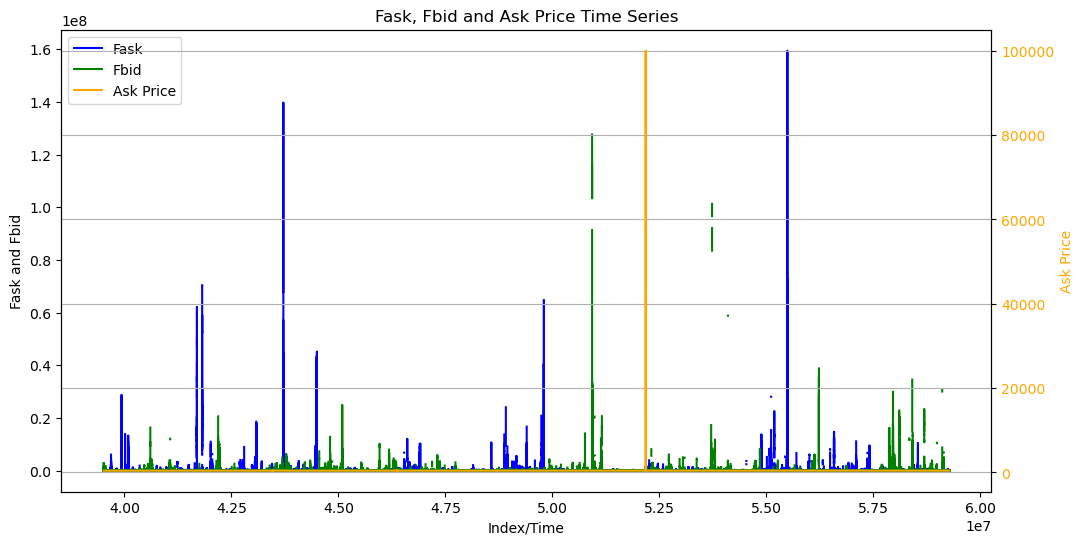

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fask and Fbid on primary y-axis
ax1.plot(df.index, df['Fask'], label='Fask', color='blue')
ax1.plot(df.index, df['Fbid'], label='Fbid', color='green')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Fask and Fbid', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create the secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Fask, Fbid and Ask Price Time Series')
plt.grid(True)
plt.show()


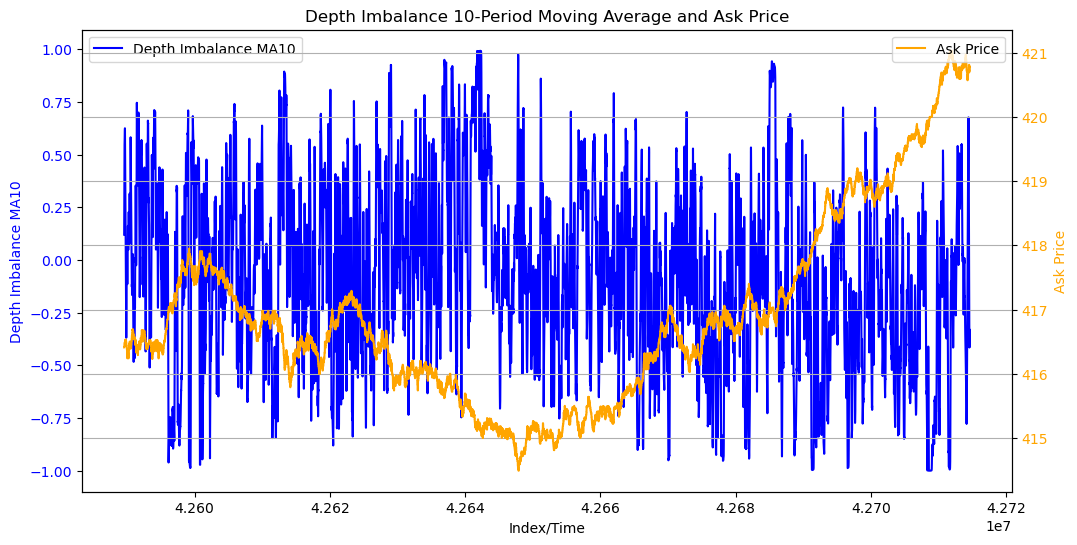

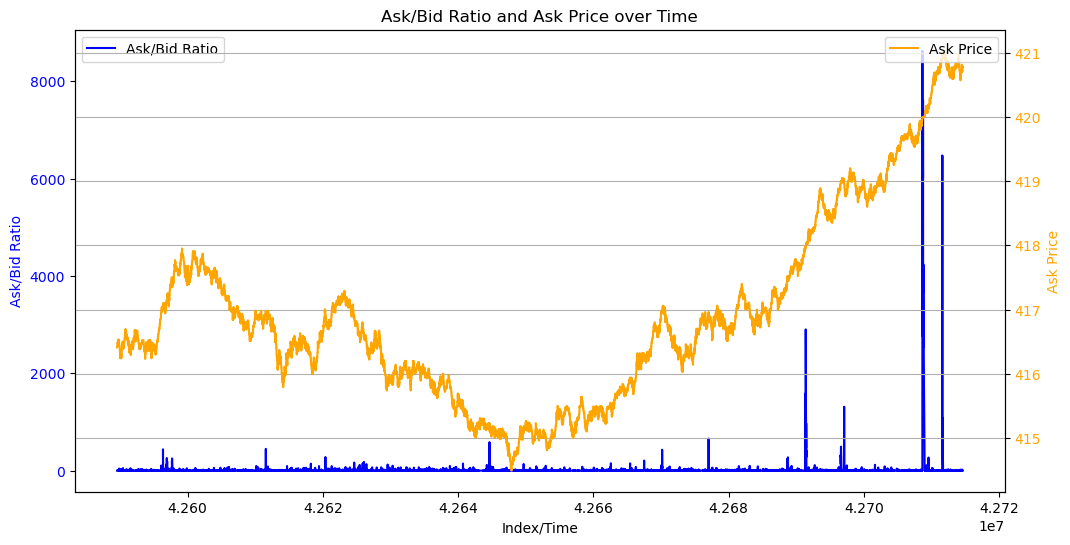

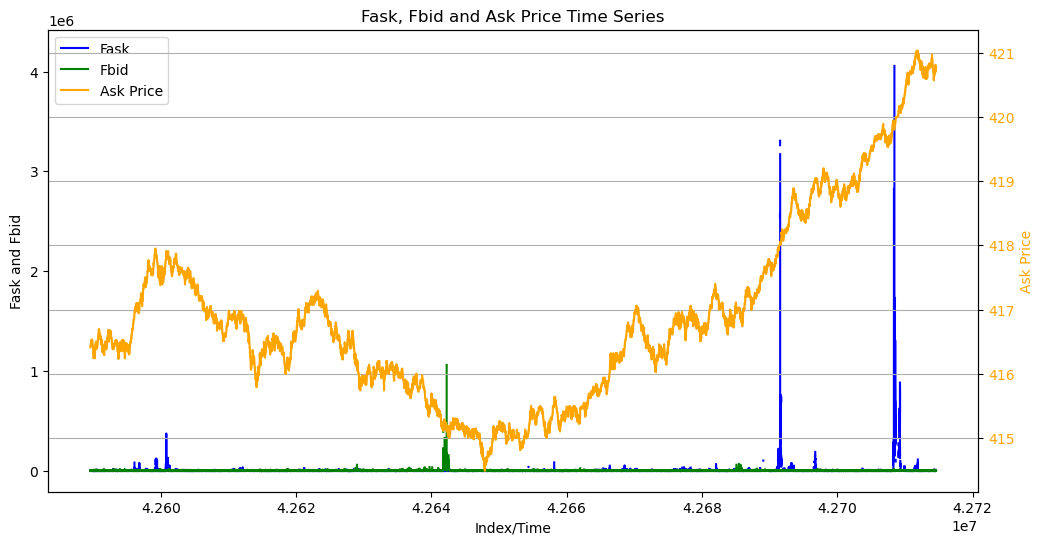

Start date: 2025-09-17 18:47:35.673386934+00:00
End date: 2025-09-17 19:00:34.884239567+00:00
Elapsed time in trimmed range: 0 days 00:12:59.210852633


In [19]:
import matplotlib.pyplot as plt

# Set your trimmed dataframe
chart_df = df.iloc[3075000:3200000]


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot depth imbalance moving average on primary y-axis
ax1.plot(chart_df.index, chart_df['depth_imbalance_MA10'], label='Depth Imbalance MA10', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Depth Imbalance MA10', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for ask price
ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Depth Imbalance 10-Period Moving Average and Ask Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# 2. Ask/Bid Ratio and Ask Price over Time
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(chart_df.index, chart_df['ask_bid_ratio'], label='Ask/Bid Ratio', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask/Bid Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Ask/Bid Ratio and Ask Price over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# 3. Fask, Fbid and Ask Price Time Series
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(chart_df.index, chart_df['Fask'], label='Fask', color='blue')
ax1.plot(chart_df.index, chart_df['Fbid'], label='Fbid', color='green')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Fask and Fbid', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Fask, Fbid and Ask Price Time Series')
plt.grid(True)
plt.show()
# Assume ts_event is datetime type, if not convert it
df['ts_event'] = pd.to_datetime(df['ts_event'])

# Set trimmed dataframe

start_date = chart_df['ts_event'].iloc[0]
end_date = chart_df['ts_event'].iloc[-1]

elapsed_time = end_date - start_date

print(f"Start date: {start_date}")
print(f"End date: {end_date}")
print(f"Elapsed time in trimmed range: {elapsed_time}")


